In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("C:\\Users\\05594\\Downloads\\diamonds.csv")

In [6]:

df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]


df['volume'] = df['x'] * df['y'] * df['z']


y = df['price']
X = df.drop(columns=['price'])


categorical_features = ['cut', 'color', 'clarity']
numerical_features = ['carat', 'x', 'y', 'z', 'depth', 'table', 'volume']

In [7]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [8]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
param_grid = {'regressor__n_estimators': [50, 100, 200],
              'regressor__max_depth': [None, 10, 20]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'x',
                                                                          'y',
                                                                          'z',
                                                                          'depth',
                                                                          'table',
                                                                          'volume']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [11]:
best_model = grid_search.best_estimator_

In [12]:
y_pred = best_model.predict(X_test)

In [13]:
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results_df.head())

   Actual     Predicted
0     874   1139.614248
1    9273   7997.942225
2   11743  11204.596131
3    1064   1040.084300
4     906    867.505285


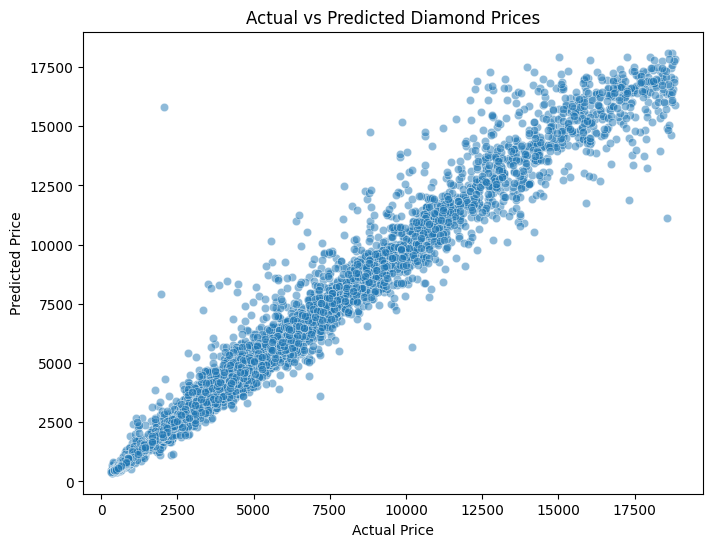

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.show()